# <a href="Resources/pdf/4_Regression_2_Ridge_Lasso_Elasticnet_Regression_230820_232239.pdf">Ridge , Lasso and Elasticnet Regression</a>

## <a href="./3_Exploratory_Data_Analysis_1.ipynb">Algerian Forest Fires Dataset :EDA and Analysis</a>
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire


In [143]:
#reading cleaned dataset
df_cleaned = pd.read_csv("Resources/Algerian_forest_fires_dataset_CLEANED.csv")
df_cleaned.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [144]:
#dropping day,month and year
df_cleaned.drop(['day','month','year'],axis=1,inplace=True)
df_cleaned.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1


In [145]:
df_cleaned['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [146]:
#replacing 'not fire' with 0 and fire with 1
df_cleaned['Classes'] = np.where(df_cleaned['Classes'].str.contains('not fire'),0,1)

In [147]:
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0


In [148]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.9 KB


In [149]:
#dividing into indipendent and dependent features
X = df_cleaned.drop('FWI',axis=1)
y = df_cleaned['FWI']

In [150]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,1
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,2
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,2
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,2
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,2


In [151]:
#train-Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(182, 11) (61, 11)
(182,) (61,)


In [152]:
#Feature selection based on correlation
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


## Multi-colinearity: 
### If two dependent features are highl ycorrelated then they can be assumed to be one feature(i.e one of the feature can be removes) otherwise raises the problem of multicolinearity

<Axes: >

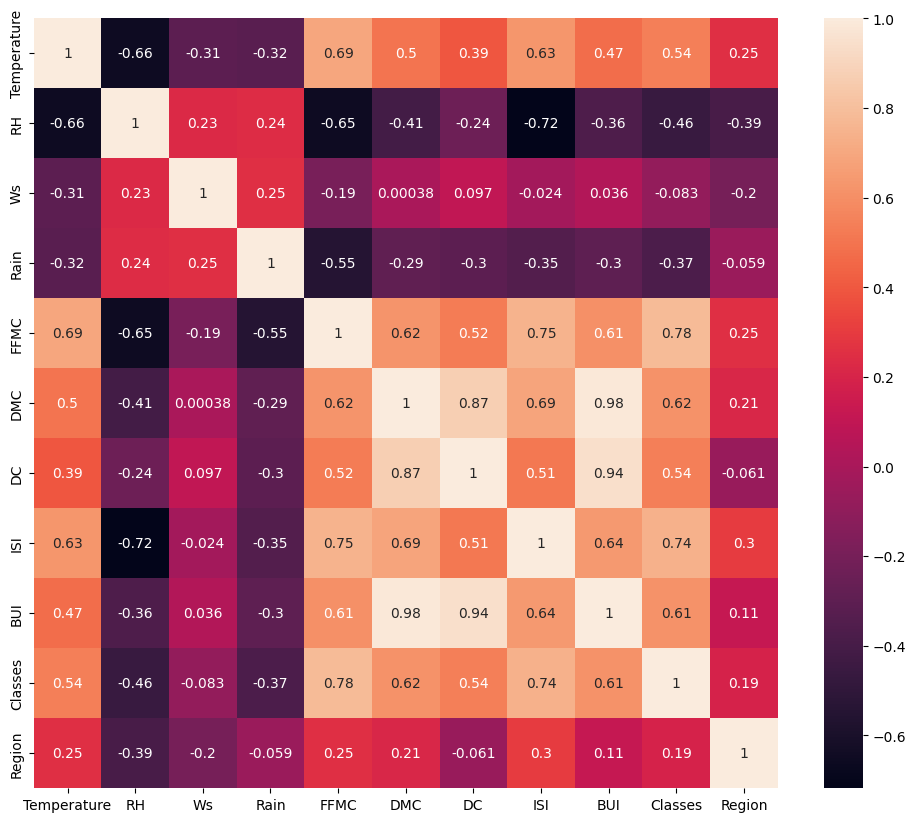

In [153]:
#checking multicollinearity
plt.figure(figsize=(12,10))
corr = x_train.corr()
sns.heatmap(corr,annot=True)

### Creating a function that removes a feature with corellation greater than than a perticular threshold

In [154]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

##threshold--Domain expertise
corr_feature = correlation(x_train,0.85)

In [155]:
corr_feature

{'BUI', 'DC'}

In [156]:
x_train.drop(corr_feature,axis=1,inplace=True)

In [157]:
x_test.drop(corr_feature,axis=1,inplace=True)

In [158]:
print(x_train.shape,x_test.shape)

(182, 9) (61, 9)


## Feature scaling standardization

In [159]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

## Plot to understand Standar Scaler

Text(0.5, 1.0, 'x_trin after scaling')

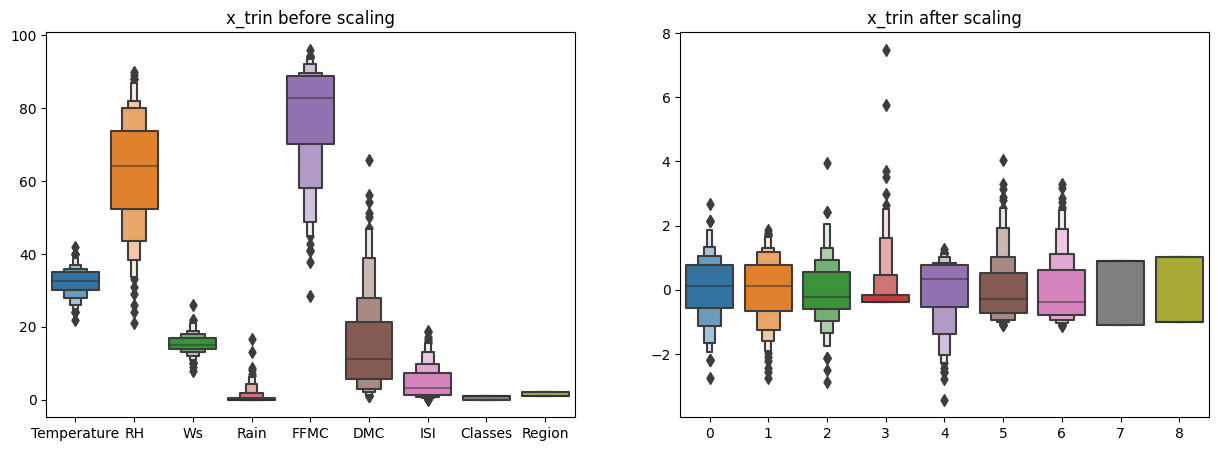

In [160]:
plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
sns.boxenplot(data=x_train)
plt.title('x_trin before scaling')
plt.subplot(122)
sns.boxenplot(data=x_train_scaled)
plt.title('x_trin after scaling')

# Linerar Regression Model

Mean Absolute Erroe  0.9939450225331374
R2 Score  0.9607056657860652


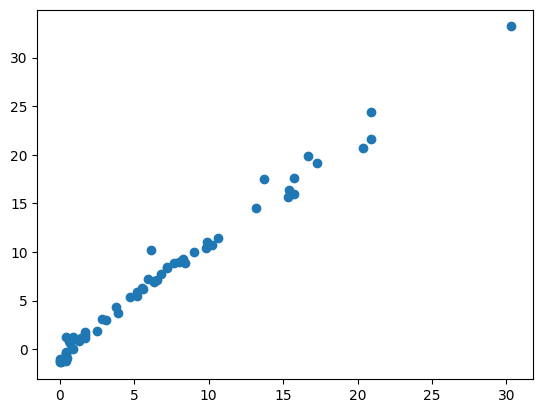

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linreg = LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_prediction = linreg.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_prediction)
score = r2_score(y_test,y_prediction)
print("Mean Absolute Erroe ",mae)
print("R2 Score ",score)
plt.scatter(y_test,y_prediction)

ValueError: x and y must be the same size

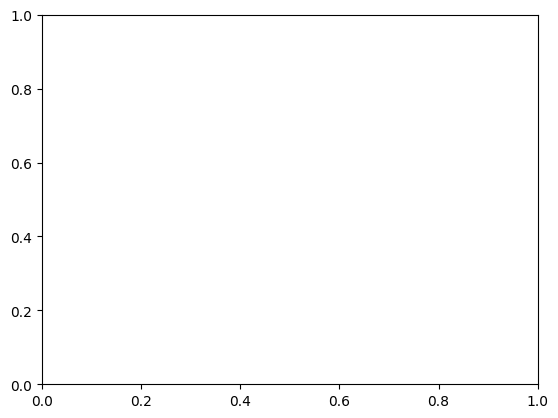

In [166]:
plt.scatter(x_train_scaled,y_train)
plt.plot(x_train_scaled[0],y_prediction,'r')
plt.show()

# Lasso Regression(For feature Selection)

MAE  0.9605020166901078
R2 Score  0.9692970913627958


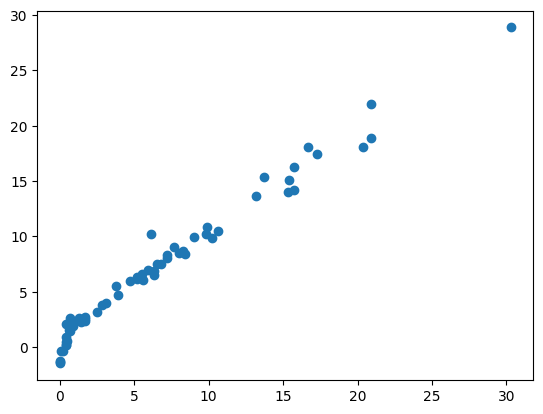

In [177]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score

lasso = Lasso(alpha=1.0) #by default alpha/lambda value=1.0
lasso.fit(x_train_scaled,y_train)
y_prediction_lasso = lasso.predict(x_test_scaled)
mae_lasso = mean_absolute_error(y_test,y_prediction_lasso)
score_lasso = r2_score(y_test,y_prediction_lasso)

print("MAE ",mae_lasso)
print("R2 Score ",score_lasso)
plt.scatter(y_test,y_prediction_lasso)

#### Now,
### Performing Hyper parameter tuning using **<u>Cross Validation</u>** data

# Lasso Cross Validation

MAE  0.9630024676566873
R2 Score  0.9611112947220234


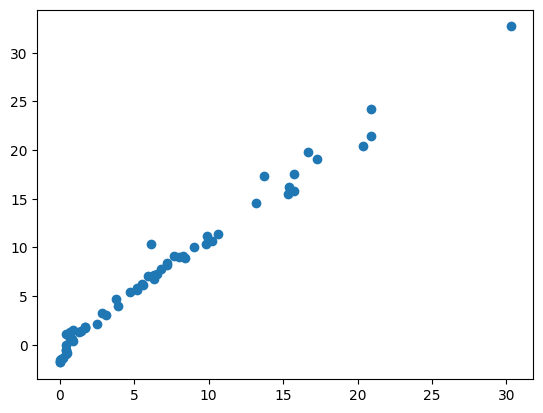

In [178]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

y_prediction_lassocv = lassocv.predict(x_test_scaled)
mae_lassocv = mean_absolute_error(y_test,y_prediction_lassocv)
score_lassocv = r2_score(y_test,y_prediction_lassocv)
print("MAE ",mae_lassocv)
print("R2 Score ",score_lassocv)
plt.scatter(y_test,y_prediction_lassocv)

# Ridge Regression model

Mean absolute error 0.9862070802884405
R2 Score 0.9616458508455313


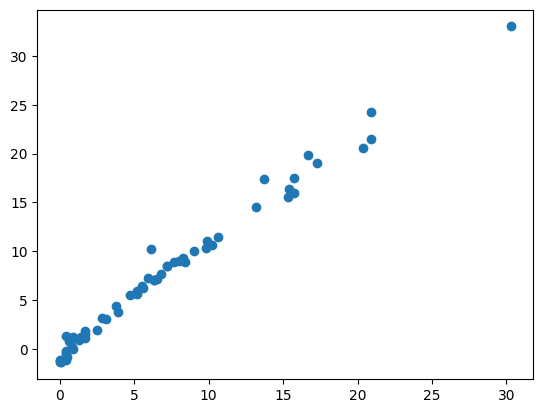

In [180]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_prediction_ridge = ridge.predict(x_test_scaled)
mae_ridge = mean_absolute_error(y_test,y_prediction_ridge)
score_ridge = r2_score(y_test,y_prediction_ridge)
print("Mean absolute error", mae_ridge)
print("R2 Score", score_ridge)
plt.scatter(y_test,y_prediction_ridge)

# Ridge Cross Validation

Mean absolute error 0.9862070802884405
R2 Score 0.9616458508455313


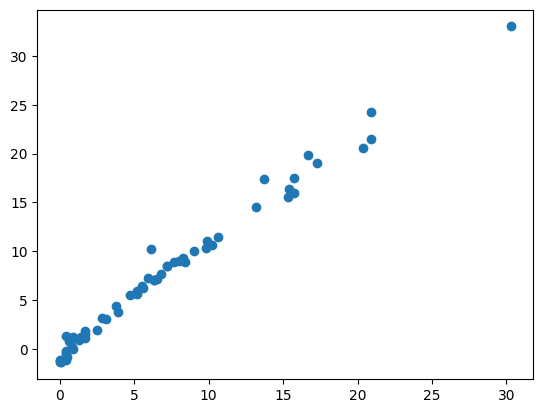

In [181]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)
y_prediction_ridgecv = ridgecv.predict(x_test_scaled)
plt.scatter(y_test,y_prediction_ridgecv)
mae_ridgecv = mean_absolute_error(y_test,y_prediction_ridgecv)
score_ridgecv = r2_score(y_test,y_prediction_ridgecv)
print("Mean absolute error", mae_ridgecv)
print("R2 Score", score_ridgecv)

In [182]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

# Elasticnet Regression

Mean absolute error 1.6511868133560943
R2 Score 0.9081701979826985


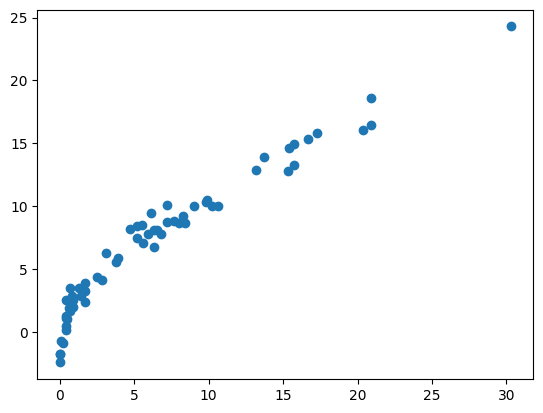

In [183]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

elastic=ElasticNet()
elastic.fit(x_train_scaled,y_train)
y_prediction_elastic = elastic.predict(x_test_scaled)
mae_elastic = mean_absolute_error(y_test,y_prediction_elastic)
score_elastic = r2_score(y_test,y_prediction_elastic)
print("Mean absolute error", mae_elastic)
print("R2 Score", score_elastic)
plt.scatter(y_test,y_prediction_elastic)

# Elasticnet Cross Validation

Mean absolute error 0.9658446127981584
R2 Score 0.9635664846226284


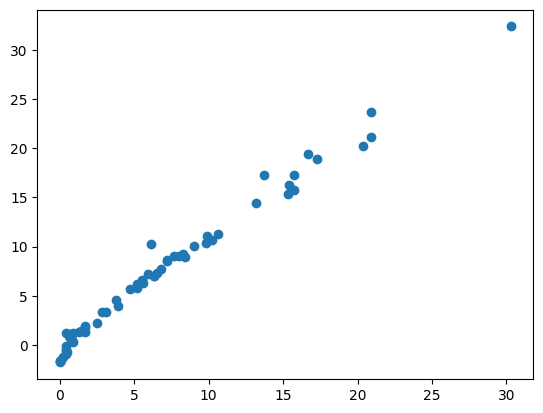

In [184]:
from sklearn.linear_model import ElasticNetCV

elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(x_train_scaled,y_train)
y_prediction_elasticcv = elasticcv.predict(x_test_scaled)
plt.scatter(y_test,y_prediction_elasticcv)
mae_elasticcv = mean_absolute_error(y_test,y_prediction_elasticcv)
score_elasticcv = r2_score(y_test,y_prediction_elasticcv)
print("Mean absolute error", mae_elasticcv)
print("R2 Score", score_elasticcv)

In [187]:
elasticcv.alpha_

0.04311146156383891

In [188]:
elasticcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

# picking model with highest r2 score

In [198]:
print(score,score_elastic,score_elasticcv,score_lasso,score_lassocv,score_ridge,score_ridgecv)

0.9607056657860652 0.9081701979826985 0.9635664846226284 0.9692970913627958 0.9611112947220234 0.9616458508455313 0.9616458508455313


### Lasso Model has highest accuracy 
### So dumping it out 
### But,
### We also must save scler cuz we must apply same standardization to future data 

In [199]:
scaler

StandardScaler()

In [200]:
lasso

Lasso()

In [201]:
import pickle
pickle.dump(scaler,open('Resources/scaler_lasso_model.pk1','wb'))
pickle.dump(lasso,open('Resources/lasso_model.pk1','wb'))